In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [88]:
wine=pd.read_csv("C:/Users/sachi/Downloads/winequality-red.csv")
wine.shape

(1599, 12)

In [89]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
print(wine.groupby('quality').size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


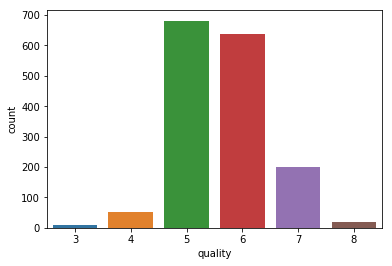

In [91]:
sns.countplot(x='quality', data=wine)

In [92]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


C:\Users\sachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


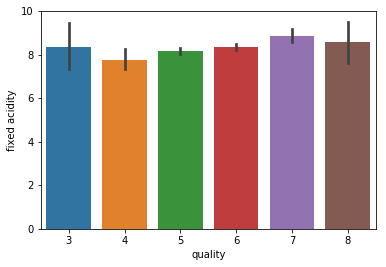

In [93]:
sns.barplot(x='quality', y='fixed acidity' ,data=wine)

C:\Users\sachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


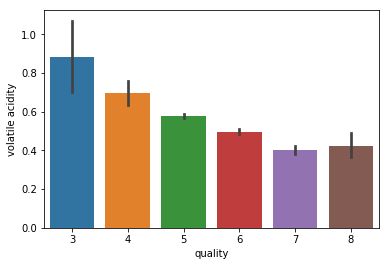

In [94]:
sns.barplot(x='quality', y='volatile acidity' ,data=wine)

In [1]:
sns.barplot(x='quality',y='citric acid',data=wine)

NameError: name 'sns' is not defined

C:\Users\sachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


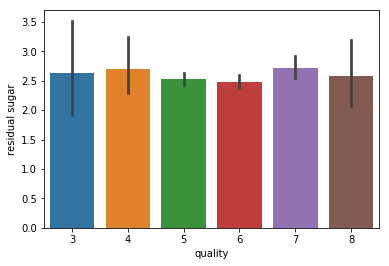

In [96]:
sns.barplot(x='quality', y='residual sugar' ,data=wine)

C:\Users\sachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


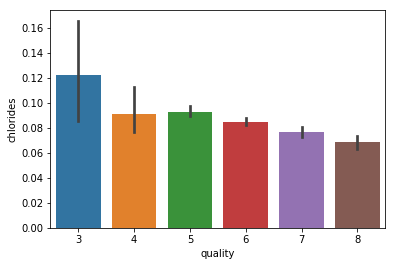

In [97]:
sns.barplot(x='quality', y='chlorides' ,data=wine)

C:\Users\sachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


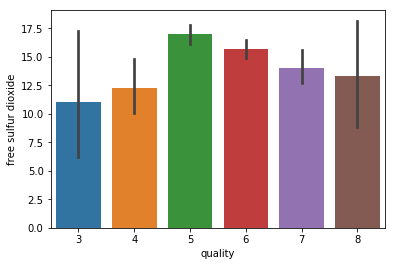

In [98]:
sns.barplot(x='quality', y='free sulfur dioxide' ,data=wine)

C:\Users\sachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


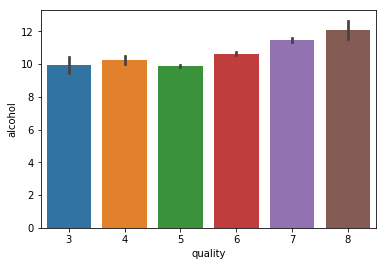

In [99]:
sns.barplot(x='quality', y='alcohol' ,data=wine)

In [100]:
print(wine.groupby('quality').size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [101]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [103]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [104]:
label_quality=LabelEncoder()
wine['quality']=label_quality.fit_transform(wine['quality'])

In [105]:
print(wine.groupby('quality').size())

quality
0    1382
1     217
dtype: int64


In [115]:
X=wine.drop('quality',axis=1)
y=wine['quality']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=66)

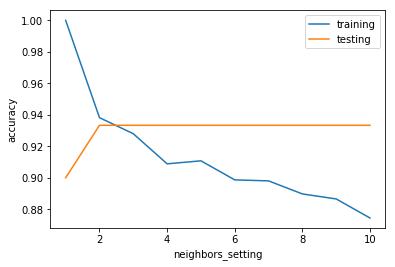

In [119]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
testing_accuracy=[]
neighbors_setting= range(1,11)
for n_neighbors in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors_setting,training_accuracy,label='training')
plt.plot(neighbors_setting,testing_accuracy,label='testing')
plt.legend()
plt.xlabel('neighbors_setting')
plt.ylabel('accuracy')
plt.show()


In [121]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print('Accuracy of K-nn classifier on training set:{:}'.format(knn.score(x_train,y_train)))
print('Accuracy of K-nn classifier on test set:{:.2f}'.format(knn.score(x_test,y_test)))

Accuracy of K-nn classifier on training set:0.9279796048438496
Accuracy of K-nn classifier on test set:0.93
